In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

LEVEL = 51
SEED = 1584353120

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
total_students = df.shape[0]

# Min number of points to pass, can be changed

students_passing_all_subjects = df[(df['math score'] > LEVEL) &
                                (df['writing score'] > LEVEL) & 
                                (df['reading score'] > LEVEL)].shape[0]

def result_of_exam( math, writing, reading):
  if(math > LEVEL and writing > LEVEL and reading > LEVEL):
    return 'P'
  else:
    return 'F'

df["Pass/Fail"] = df.apply(lambda x: result_of_exam(x['math score'],
                                                    x['writing score'],
                                                    x['reading score']), axis=1)  

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


In [6]:
df.shape

(1000, 9)

In [7]:
y=df['Pass/Fail']
lb=LabelEncoder()
y = lb.fit_transform(y)
X=df[['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'Pass/Fail']]

In [8]:
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=SEED)

def encode_features(df_train, df_test):
  features = ['gender', 'race/ethnicity', 'parental level of education',
              'lunch', 'test preparation course', 'Pass/Fail']
  df_combined = pd.concat([df_train[features], df_test[features]])

  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_combined[feature])
    df_train[feature] = le.transform(df_train[feature])
    df_test[feature] = le.transform(df_test[feature])
  return df_train, df_test

X_train, X_test = encode_features(X_train, X_test)
#feature importances for better visualization
X_fin = pd.concat([X_train, X_test])

y=X_fin.iloc[:,-1] 
X_fin = X_fin.drop('Pass/Fail', axis=1)
X_train=X_train.drop('Pass/Fail', axis=1)
X_test=X_test.drop('Pass/Fail', axis=1)
X_fin.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
598,0,3,2,1,1
689,1,4,4,0,1
123,1,3,2,0,1
756,1,3,4,1,1
694,0,2,5,1,1


In [9]:
# Simple function for visualization
def plot_model(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def print_scores(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f_score = f1_score(y_test, predictions)

    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1_score: {}'.format(
            acc, precision, recall, f_score))

    sns.heatmap(cm, annot=True, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[How to split datasets?](https://www.youtube.com/watch?v=M3qpIzy4MQk)

In [16]:
# Shallow model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.1)
predictions = model.predict(X_test) > 0.5

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 0.6377 - accuracy: 0.6571 - val_loss: 0.5627 - val_accuracy: 0.8429
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.7714 - val_loss: 0.4941 - val_accuracy: 0.8429
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7714 - val_loss: 0.4567 - val_accuracy: 0.8429
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5209 - accuracy: 0.7714 - val_loss: 0.4445 - val_accuracy: 0.8429
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5140 - accuracy: 0.7714 - val_loss: 0.4269 - val_accuracy: 0.8429
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7714 - val_loss: 0.4131 - val_accuracy: 0.8429
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.7714 - val_loss: 0.4031 - val_accuracy: 0.8429
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4628 - accuracy: 0.7762 - val_loss: 0.3643 - val_accuracy: 0.8429
Epoch 60/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4623 - accuracy: 0.7730 - val_loss: 0.3669 - val_accuracy: 0.8429
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.7794 - val_loss: 0.3450 - val_accuracy: 0.8571
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4610 - accuracy: 0.7778 - val_loss: 0.3452 - val_accuracy: 0.8571
Epoch 63/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4611 - accuracy: 0.7762 - val_loss: 0.3551 - val_accuracy: 0.8571
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.7714 - val_loss: 0.3458 - val_accuracy: 0.8571
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.7810 - val_loss: 0.3492 - val_accuracy: 0.8571
Epoch 

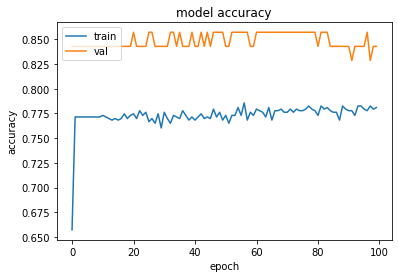

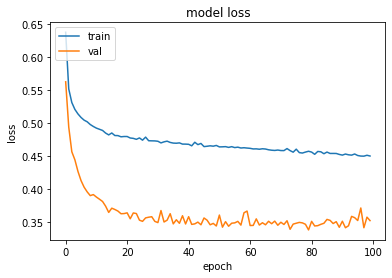

Accuracy: 0.78
Precision: 0.7881944444444444
Recall: 0.978448275862069
F1_score: 0.8730769230769231


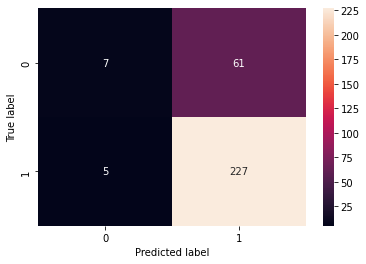

In [17]:
plot_model(history)
print_scores(y_test, predictions)

In [18]:
# A deeper model

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.1)
predictions = model.predict(X_test) > 0.5

Epoch 1/100
10/10 [==============================] - 1s 15ms/step - loss: 0.6418 - accuracy: 0.6698 - val_loss: 0.5617 - val_accuracy: 0.8429
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7714 - val_loss: 0.4957 - val_accuracy: 0.8429
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5367 - accuracy: 0.7714 - val_loss: 0.4543 - val_accuracy: 0.8429
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5243 - accuracy: 0.7714 - val_loss: 0.4284 - val_accuracy: 0.8429
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.7714 - val_loss: 0.4098 - val_accuracy: 0.8429
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7714 - val_loss: 0.3969 - val_accuracy: 0.8429
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4987 - accuracy: 0.7714 - val_loss: 0.3967 - val_accuracy: 0.8429
Epoch 8/100


10/10 [==============================] - 0s 4ms/step - loss: 0.4552 - accuracy: 0.7841 - val_loss: 0.3331 - val_accuracy: 0.8571
Epoch 59/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.7841 - val_loss: 0.3602 - val_accuracy: 0.8571
Epoch 60/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.7905 - val_loss: 0.3360 - val_accuracy: 0.8571
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7841 - val_loss: 0.3448 - val_accuracy: 0.8571
Epoch 62/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7794 - val_loss: 0.3519 - val_accuracy: 0.8429
Epoch 63/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.7857 - val_loss: 0.3311 - val_accuracy: 0.8571
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.7825 - val_loss: 0.3378 - val_accuracy: 0.8571
Epoch 65/100
10/10 

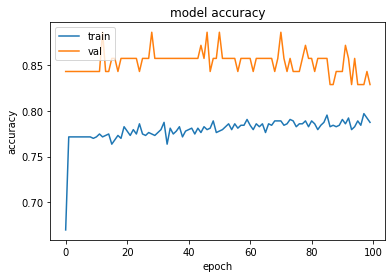

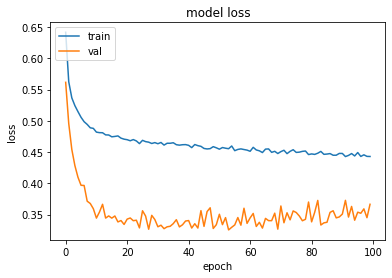

Accuracy: 0.7533333333333333
Precision: 0.7904411764705882
Recall: 0.9267241379310345
F1_score: 0.8531746031746033


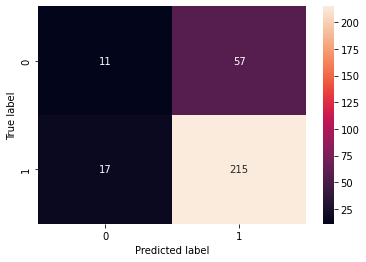

In [19]:
plot_model(history)
print_scores(y_test, predictions)

[Dropout](https://www.example.com)

In [20]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=5))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.1) # 
predictions = model.predict(X_test) > 0.5

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 0.5433 - accuracy: 0.7635 - val_loss: 0.4383 - val_accuracy: 0.8429
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5216 - accuracy: 0.7667 - val_loss: 0.3900 - val_accuracy: 0.8429
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.7730 - val_loss: 0.3959 - val_accuracy: 0.8429
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.7683 - val_loss: 0.3863 - val_accuracy: 0.8429
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5267 - accuracy: 0.7730 - val_loss: 0.3909 - val_accuracy: 0.8429
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5091 - accuracy: 0.7714 - val_loss: 0.3767 - val_accuracy: 0.8429
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5109 - accuracy: 0.7698 - val_loss: 0.3683 - val_accuracy: 0.8429
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.7714 - val_loss: 0.3531 - val_accuracy: 0.8429
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.7730 - val_loss: 0.3583 - val_accuracy: 0.8429
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7683 - val_loss: 0.3593 - val_accuracy: 0.8429
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4744 - accuracy: 0.7730 - val_loss: 0.3692 - val_accuracy: 0.8429
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4728 - accuracy: 0.7714 - val_loss: 0.3459 - val_accuracy: 0.8429
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4702 - accuracy: 0.7730 - val_loss: 0.3502 - val_accuracy: 0.8429
Epoch 65/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4584 - accuracy: 0.7746 - val_loss: 0.3459 - val_accuracy: 0.8429
Epoch 

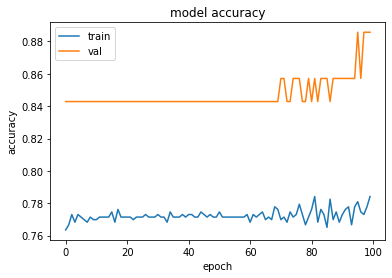

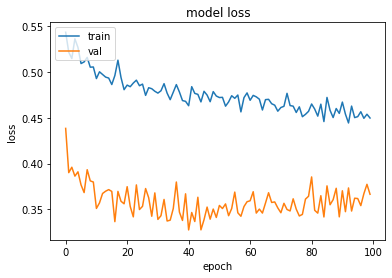

Accuracy: 0.7733333333333333
Precision: 0.7808219178082192
Recall: 0.9827586206896551
F1_score: 0.8702290076335878


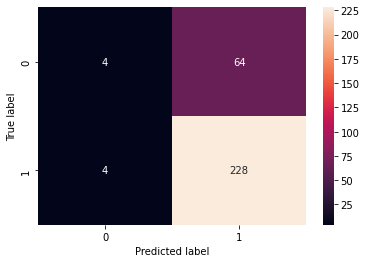

In [21]:
plot_model(history)
print_scores(y_test, predictions)

[Backpropagation](https://www.youtube.com/watch?v=yXcQ4B-YSjQ)

[Stochastic Gradient Descent]()